# This is a Jupyter Notebook

It's great, you can basically divide up your thinking into individual units, check your outputs and iterate quickly. You install jupyter with pip, I'd recommend using [jupyter labs](https://jupyterlab.readthedocs.io/en/stable/getting_started/installation.html) over notebooks as it gives you some nice extra features.

The danger is of course that if you run things out of order you will get yourself into bother! As such it's good to adopt some good practices:
* Imports at the top
* Reading in data and essential data prep next
* Then iterating and playing
* Oh, and use sensible names! I know it's a scratch pad but help future you out!

## Things you need to know from the get go
There's two modes, editor and command. In command mode you can move between cells, add new ones (press a or b) or delete them (press dd). You can also change the cell type to markdown (press m).

Edit a cell by pressing enter, toggle back to command with escape.

Execute with ctrl+enter to stay in a cell, shift+enter to move to the next one.

[here's a command cheat sheet](https://www.edureka.co/blog/wp-content/uploads/2018/10/Jupyter_Notebook_CheatSheet_Edureka.pdf) but that's pretty much all I have in my muscle memory

# Working with git
Jupyter and Git do not get along. Under the bonnet jupyter is a mess of json that is both complex and frequenlty updated. Be really careful what you commit and push as a conflict is often easier to roll back than resolve.

R does this better but that's not the world we are in.

# Do I have to use Python?
Nope. You can get kernels for Scala, pyspark, R and many other languages. If it's REPL it probably exists, if it isn't it may do anyway.

# Pandas is your data workhorse in most environments
Provided it fits in RAM of course!

In [1]:
import pandas as pd

# Reading data
Easy enough this, you can also read data from a dict, json, parquet or even a sql query if that's your bag. Today we will be working with a dataset of Star Wars characters I lifted off the internet. It's my session so live with it!

In [7]:
sw_df = pd.read_csv("star_wars.csv")
sw_df.head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species,films,vehicles,starship
0,Luke Skywalker,172,77.0,blond,fair,blue,19.0,male,Tatooine,Human,"Revenge of the Sith, Return of the Jedi, The E...","Snowspeeder, Imperial Speeder Bike","X-wing, Imperial shuttle"
1,C-3PO,167,75.0,NaN,gold,yellow,112.0,NaN,Tatooine,Droid,"Attack of the Clones, The Phantom Menace, Reve...",NaN,NaN
2,R2-D2,96,32.0,NaN,"white, blue",red,33.0,NaN,Naboo,Droid,"Attack of the Clones, The Phantom Menace, Reve...",NaN,NaN
3,Darth Vader,202,136.0,none,white,yellow,41.9,male,Tatooine,Human,"Revenge of the Sith, Return of the Jedi, The E...",NaN,TIE Advanced x1
4,Leia Organa,150,49.0,brown,light,brown,19.0,female,Alderaan,Human,"Revenge of the Sith, Return of the Jedi, The E...",Imperial Speeder Bike,NaN


# The Dataframe Object
Pandas Dataframes are objects with various attributes and methods. Let's start simple, looking at the shape attribute:

In [8]:
sw_df.shape

(87, 13)

This is Rows, columns (x, y). Remember this order as it's used everywhere. Rows are axis 0 and columns are axis 1.

## Rows
I hate pandas rows. They awful as the idea of a row index is pretty strongly enforced and can create some natty issues, especially with joining or creating CSVs. Many is the time a weird bug will be fixed by resetting the index.

You can see the index here on the left but it's also accessible as an attribute.


In [9]:
sw_df.head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species,films,vehicles,starship
0,Luke Skywalker,172,77.0,blond,fair,blue,19.0,male,Tatooine,Human,"Revenge of the Sith, Return of the Jedi, The E...","Snowspeeder, Imperial Speeder Bike","X-wing, Imperial shuttle"
1,C-3PO,167,75.0,NaN,gold,yellow,112.0,NaN,Tatooine,Droid,"Attack of the Clones, The Phantom Menace, Reve...",NaN,NaN
2,R2-D2,96,32.0,NaN,"white, blue",red,33.0,NaN,Naboo,Droid,"Attack of the Clones, The Phantom Menace, Reve...",NaN,NaN
3,Darth Vader,202,136.0,none,white,yellow,41.9,male,Tatooine,Human,"Revenge of the Sith, Return of the Jedi, The E...",NaN,TIE Advanced x1
4,Leia Organa,150,49.0,brown,light,brown,19.0,female,Alderaan,Human,"Revenge of the Sith, Return of the Jedi, The E...",Imperial Speeder Bike,NaN


In [10]:
sw_df

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species,films,vehicles,starship
0,Luke Skywalker,172,77.0,blond,fair,blue,19.0,male,Tatooine,Human,"Revenge of the Sith, Return of the Jedi, The E...","Snowspeeder, Imperial Speeder Bike","X-wing, Imperial shuttle"
1,C-3PO,167,75.0,NaN,gold,yellow,112.0,NaN,Tatooine,Droid,"Attack of the Clones, The Phantom Menace, Reve...",NaN,NaN
2,R2-D2,96,32.0,NaN,"white, blue",red,33.0,NaN,Naboo,Droid,"Attack of the Clones, The Phantom Menace, Reve...",NaN,NaN
3,Darth Vader,202,136.0,none,white,yellow,41.9,male,Tatooine,Human,"Revenge of the Sith, Return of the Jedi, The E...",NaN,TIE Advanced x1
4,Leia Organa,150,49.0,brown,light,brown,19.0,female,Alderaan,Human,"Revenge of the Sith, Return of the Jedi, The E...",Imperial Speeder Bike,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,Rey,0,0.0,brown,light,hazel,NaN,female,NaN,Human,The Force Awakens,NaN,NaN
83,Poe Dameron,0,0.0,brown,light,brown,NaN,male,NaN,Human,The Force Awakens,NaN,T-70 X-wing fighter
84,BB8,0,0.0,none,none,black,NaN,none,NaN,Droid,The Force Awakens,NaN,NaN
85,Captain Phasma,0,0.0,unknown,unknown,unknown,0.0,female,NaN,NaN,The Force Awakens,NaN,NaN


In [11]:
sw_df.index

RangeIndex(start=0, stop=87, step=1)

# Columns
Columns are objects in and of themselves. They represent individual Pandas series and each have their own data type.

In [12]:
sw_df.columns

Index(['name', 'height', 'mass', 'hair_color', 'skin_color', 'eye_color',
       'birth_year', 'gender', 'homeworld', 'species', 'films', 'vehicles',
       'starship'],
      dtype='object')

In [13]:
sw_df.dtypes

name           object
height          int64
mass          float64
hair_color     object
skin_color     object
eye_color      object
birth_year    float64
gender         object
homeworld      object
species        object
films          object
vehicles       object
starship       object
dtype: object

You can select individual columns (remember these are actually `Series` objects) with dot notation:

In [14]:
sw_df.height.head()

0    172
1    167
2     96
3    202
4    150
Name: height, dtype: int64

## One final gotcha
You may have noticed with calls to things like `head()` that most pandas methods *return something*. Very few (if any) will operate on the object itself. This makes a lot of sense when you are playing with data, you don't want to keep overwriting your main dataframe! It does also make a lot of OO people very cross.

# Basic data exploration

Alright, that's the boring stuff out of the way. You may have missed it but we just did a fair bit of exploratory data analysis. Notably:
* We have 87 individuals from star wars in our data
* We have 13 attributes for each person, we know what they are
* Most have been auto-assigned as Objects (strings), height is an integer and mass/birth year are floats. Of course we should check that this makes sense IRL!

Let's have a look at some of the data we've extracted. I've not kept all my exploration here for brevity but you can gurantee that each section started with me calling `head()` to remind me of the data structure!


## High level stats and NA checks

In [15]:
sw_df.describe(include="object") # Needed to check non-numerics

,name,hair_color,skin_color,eye_color,gender,homeworld,species,films,vehicles,starship
count,87,82,87,87,84,77,82,87,11,20
unique,87,12,31,15,4,48,37,24,10,16
top,Luke Skywalker,none,fair,brown,male,Naboo,Human,Attack of the Clones,Tribubble bongo,X-wing
freq,1,37,17,21,62,11,35,13,2,3


In [16]:
sw_df.describe() # Default is just numerics

,height,mass,birth_year
count,87.000000,82.000000,45.000000
mean,162.333333,70.017073,83.673333
std,55.671726,149.988586,152.232647
min,0.000000,0.000000,0.000000
25%,164.000000,0.000000,31.500000
50%,178.000000,65.500000,48.000000
75%,190.500000,81.500000,72.000000
max,264.000000,1358.000000,896.000000


In [17]:
sw_df.isna().mean()

name          0.000000
height        0.000000
mass          0.057471
hair_color    0.057471
skin_color    0.000000
eye_color     0.000000
birth_year    0.482759
gender        0.034483
homeworld     0.114943
species       0.057471
films         0.000000
vehicles      0.873563
starship      0.770115
dtype: float64

Okay, that last one needs some explaining. `is.na` will transform every value in the dataframe to a true or a false, `mean` will take the average of every column, in the case of booleans (0/1), the average is equal to the proportion that are True.

From this we can see that some columns (such as birth year) are actually quite sparse while others (such as film) are always populated.


## You ever noticed the lack of diversity in Star Wars?

In [18]:
sw_df.species.unique()

array(['Human', 'Droid', 'Wookiee', 'Rodian', 'Hutt', "Yoda's species",
       'Trandoshan', 'Mon Calamari', 'Ewok', 'Sullustan', 'Neimodian',
       'Gungan', nan, 'Toydarian', 'Dug', 'Zabrak', "Twi'lek",
       'Vulptereen', 'Xexto', 'Toong', 'Cerean', 'Nautolan', 'Tholothian',
       'Iktotchi', 'Quermian', 'Kel Dor', 'Chagrian', 'Geonosian',
       'Mirialan', 'Clawdite', 'Besalisk', 'Kaminoan', 'Aleena',
       'Skakoan', 'Muun', 'Togruta', 'Kaleesh', "Pau'an"], dtype=object)

In [19]:
sw_df.species.value_counts()

Human             35
Droid              5
Gungan             3
Mirialan           2
Wookiee            2
Twi'lek            2
Kaminoan           2
Zabrak             2
Quermian           1
Kel Dor            1
Chagrian           1
Geonosian          1
Clawdite           1
Tholothian         1
Besalisk           1
Aleena             1
Skakoan            1
Muun               1
Togruta            1
Kaleesh            1
Iktotchi           1
Toong              1
Nautolan           1
Cerean             1
Xexto              1
Vulptereen         1
Dug                1
Toydarian          1
Neimodian          1
Sullustan          1
Ewok               1
Mon Calamari       1
Trandoshan         1
Yoda's species     1
Hutt               1
Rodian             1
Pau'an             1
Name: species, dtype: int64

Our data here contain 38 individual species but 35 of them are human!

Also remember that there's some NaN values in the species data. We can have a look at them in isolation with `loc`.

In [20]:
sw_df.loc[pd.isnull(sw_df.species)]

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species,films,vehicles,starship
36,Ric Olié,183,0.0,brown,fair,blue,NaN,male,Naboo,NaN,The Phantom Menace,NaN,Naboo Royal Starship
39,Quarsh Panaka,183,NaN,black,dark,brown,62.0,male,Naboo,NaN,The Phantom Menace,NaN,NaN
72,R4-P17,96,0.0,none,"silver, red","red, blue",NaN,female,NaN,NaN,"Attack of the Clones, Revenge of the Sith",NaN,NaN
79,Sly Moore,178,48.0,none,pale,white,NaN,female,Umbara,NaN,"Attack of the Clones, Revenge of the Sith",NaN,NaN
85,Captain Phasma,0,0.0,unknown,unknown,unknown,0.0,female,NaN,NaN,The Force Awakens,NaN,NaN


Let's unpack that a bit! `loc` is basically a way of filtering the dataframe, here I've passed it a series that is `True` whenever the species value is NaN.

We can see that the characters missing species are genreally bit-players which makes sense, it was probably never written in.

We can extend `loc` to columns too if we want a simpler table, interestingly we do know a number of these people's home planets, even if we don't know their species!

In [21]:
sw_df.loc[pd.isnull(sw_df.species), ["name", "homeworld"]]

,name,homeworld
36,Ric Olié,Naboo
39,Quarsh Panaka,Naboo
72,R4-P17,NaN
79,Sly Moore,Umbara
85,Captain Phasma,NaN


This last one is a little contrived. I want to see all the species that have Naboo as their homeworld, maybe I can learn somethign about our NaN people. To do this I keep all rows but only the two columns we are interested in, deduplicate to get only unique pairs and then sort by values so I can find naboo easily.

Yes there are easier ways, I'm demoing here!

In [22]:
sw_df.loc[:,["species", "homeworld"]]\
    .drop_duplicates()\
    .sort_values("homeworld")

,species,homeworld
4,Human,Alderaan
71,Aleena,Aleen Minor
24,Human,Bespin
17,Human,Bestine IV
31,Neimodian,Cato Neimoidia
48,Cerean,Cerea
55,Chagrian,Champala
26,Human,Chandrila
65,Human,Concord Dawn
13,Human,Corellia


# Data Manipulation: What's Jabba's BMI?
Why not!?

## Are the data up to the task?!
Well, it looks like we've got some outliers in mass and both series have a number of 0s in them. As someone can't have zero mass I'm going to assume that's an error!

<AxesSubplot:>

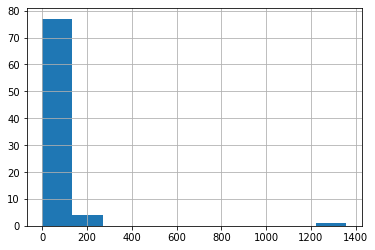

In [25]:
sw_df.mass.hist()

<AxesSubplot:>

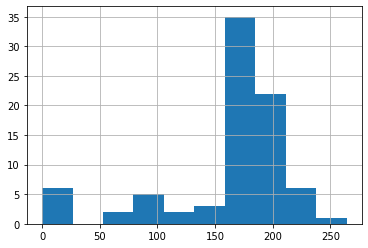

In [85]:
bmi_calc_df.height.hist()

In [23]:
sw_df.describe() 

,height,mass,birth_year
count,87.000000,82.000000,45.000000
mean,162.333333,70.017073,83.673333
std,55.671726,149.988586,152.232647
min,0.000000,0.000000,0.000000
25%,164.000000,0.000000,31.500000
50%,178.000000,65.500000,48.000000
75%,190.500000,81.500000,72.000000
max,264.000000,1358.000000,896.000000


## How to fix these so we can do our calculation?
We need multiple filter conditions. Note how I've wrapped each in parenthesis. This is vital to make sure they are evaluated properly!!

In [48]:
bmi_calc_df = sw_df.loc[(~pd.isnull(sw_df.mass)) & (sw_df.mass != 0) & (sw_df.height != 0), :]
bmi_calc_df.shape  # 28 values gone.

(59, 13)

## Calculating BMI
The equation is kg / m^2 so we first need to make height meters. I'm not using dot notation for the columns here, that's because neither of them already exist so I can't access them as attributes!

In [49]:
bmi_calc_df["height_m"] = bmi_calc_df.height / 100
bmi_calc_df["bmi"] = bmi_calc_df.mass / (bmi_calc_df.height_m**2)

C:\Users\ROBERT~1.MAN\AppData\Local\Temp/ipykernel_12868/417144327.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bmi_calc_df["height_m"] = bmi_calc_df.height / 100
C:\Users\ROBERT~1.MAN\AppData\Local\Temp/ipykernel_12868/417144327.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bmi_calc_df["bmi"] = bmi_calc_df.mass / (bmi_calc_df.height_m**2)


What's happened here?! Well, a variable in python is a memory reference, not a unique object so Pandas is very cautious when doing operations on things that you've filtered from other datasets. In this case it's probably being a bit over-cautious but let's do the good practice thing anyway and add `copy()`

In [53]:
bmi_calc_df = sw_df.loc[(~pd.isnull(sw_df.mass)) & (sw_df.mass != 0) & (sw_df.height != 0), :].copy()  

bmi_calc_df["height_m"] = bmi_calc_df.height / 100
bmi_calc_df["bmi"] = bmi_calc_df.mass / (bmi_calc_df.height_m**2)
bmi_calc_df.head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species,films,vehicles,starship,height_m,bmi
0,Luke Skywalker,172,77.0,blond,fair,blue,19.0,male,Tatooine,Human,"Revenge of the Sith, Return of the Jedi, The E...","Snowspeeder, Imperial Speeder Bike","X-wing, Imperial shuttle",1.72,26.027582
1,C-3PO,167,75.0,NaN,gold,yellow,112.0,NaN,Tatooine,Droid,"Attack of the Clones, The Phantom Menace, Reve...",NaN,NaN,1.67,26.892323
2,R2-D2,96,32.0,NaN,"white, blue",red,33.0,NaN,Naboo,Droid,"Attack of the Clones, The Phantom Menace, Reve...",NaN,NaN,0.96,34.722222
3,Darth Vader,202,136.0,none,white,yellow,41.9,male,Tatooine,Human,"Revenge of the Sith, Return of the Jedi, The E...",NaN,TIE Advanced x1,2.02,33.330066
4,Leia Organa,150,49.0,brown,light,brown,19.0,female,Alderaan,Human,"Revenge of the Sith, Return of the Jedi, The E...",Imperial Speeder Bike,NaN,1.50,21.777778


## How did we do? 

<AxesSubplot:>

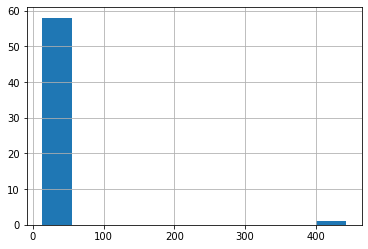

In [56]:
bmi_calc_df.bmi.hist()

In [66]:
bmi_calc_df.sort_values("bmi", ascending=False).head()

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,species,films,vehicles,starship,height_m,bmi
15,Jabba Desilijic Tiure,175,1358.0,NaN,"green-tan, brown",orange,600.0,hermaphrodite,Nal Hutta,Hutt,"The Phantom Menace, Return of the Jedi, A New ...",NaN,NaN,1.75,443.428571
44,Dud Bolt,94,45.0,none,"blue, grey",yellow,NaN,male,Vulpter,Vulptereen,The Phantom Menace,NaN,NaN,0.94,50.928022
18,Yoda,66,17.0,white,green,brown,896.0,male,NaN,Yoda's species,"Attack of the Clones, The Phantom Menace, Reve...",NaN,NaN,0.66,39.026630
5,Owen Lars,178,120.0,"brown, grey",light,blue,52.0,male,Tatooine,Human,"Attack of the Clones, Revenge of the Sith, A N...",NaN,NaN,1.78,37.874006
21,IG-88,200,140.0,none,metal,red,15.0,none,NaN,Droid,The Empire Strikes Back,NaN,NaN,2.00,35.000000


# Last thing to learn: Group By
The last question I want to ask is: what is the average BMI forthe different sexes, for this we need a group by!

In [62]:
bmi_calc_df[["gender", "bmi"]].groupby("gender").mean()

,bmi
gender,
female,18.820022
hermaphrodite,443.428571
male,25.650372
none,35.000000


We can do as many different aggreagates as we want here, there's loads of ways to do this depending on what you are trying to accomplish

In [65]:
bmi_calc_df[["gender", "bmi"]].groupby("gender").agg(["mean", "median", "count"])

bmi                  
                     mean      median count
gender                                     
female          18.820022   18.067511    10
hermaphrodite  443.428571  443.428571     1
male            25.650372   24.708270    44
none            35.000000   35.000000     1

# Plotting
This is a story for another day. Pandas has plenty of stuff tacked onto dataframe and series objects you can use. If you feel like something more then tryout Seaborn or Plotly. I use plotnine which is an implementation of [the grammar of graphics](https://www.amazon.co.uk/Grammar-Graphics-Statistics-Computing/dp/0387245448) but that makes it a little arcane.

Here's a scatter plot in pandas for reference

<AxesSubplot:xlabel='height', ylabel='mass'>

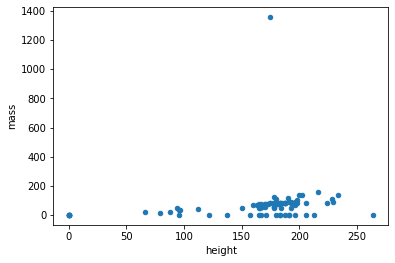

In [67]:
sw_df.plot.scatter("height", "mass")